# Navie Bayes

In [43]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Loading and Analysing data

In [ ]:
# Traning data

In [49]:
data=pd.read_csv('/content/SalaryData_Train.csv')
data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
# Test data

In [51]:
test_data=pd.read_csv('/content/SalaryData_Test.csv')
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


**Here we can see there are no NaN values**

In [6]:
data['age'].describe()

count    30161.000000
mean        38.438115
std         13.134830
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

**In our dataset the age of members range for 17 - 90 years.They all are from different cities and with different occupations.**

In [7]:
data.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

## Data Preprocessing

In [ ]:
# Lable encodeing target variable
# Training data

In [54]:
labelencoder = LabelEncoder()
data.iloc[:, -1] = labelencoder.fit_transform(data.iloc[:,-1])
data


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [ ]:
# Lable encodeing target variable
# Test data

In [77]:
labelencoder = LabelEncoder()
test_data.iloc[:, -1] = labelencoder.fit_transform(test_data.iloc[:,-1])
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [78]:
# target and dependent variables of training data
x_train=pd.get_dummies(data.iloc[:,:13])

y_train=data.iloc[:,-1]


In [79]:
# target and dependent variables of test data
x_test=pd.get_dummies(test_data.iloc[:,:13])
y_test=test_data.iloc[:,-1]


In [ ]:
# Target variable values count of training data

In [25]:
data.Salary.value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


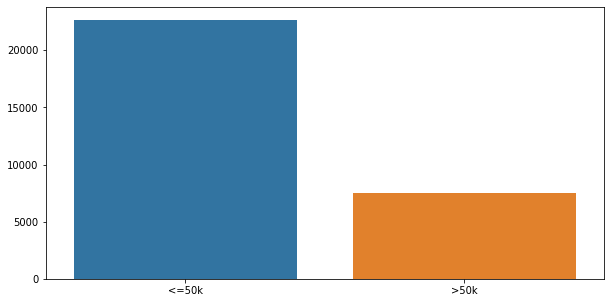

In [42]:
fig = plt.figure(figsize = (10, 5))
sal=['<=50k','>50k']
count=[22653,7508]
plot=sns.barplot(sal,count);

**In our data more members are with salary <= 50k (nearly 75%) and remaning are with salary >50k.There is imbalance in our data,this may rise overfitting problem with our model when use for test data.So , we are using SMOTE method to overcome this problem by generating synthetic samples  for the minority class(i.e >50k) without any data loss.**

## SMOTE Model

In [76]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x_train_sm,y_train_sm=smt.fit_resample(x_train,y_train)
d=pd.DataFrame(y_train_sm)
d.value_counts()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    22653
0    22653
dtype: int64

**Here we can see the data is balanced**

## Model Building

In [86]:
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB


**Model Buliding with Default training dataset(Imbalance data)**

In [90]:
# Multinomial Naive Bayes 
classifier_mb = MB()
classifier_mb.fit(x_train,y_train)
train_pred_m = classifier_mb.predict(x_train)
accuracy_train_m = np.mean(train_pred_m==y_train) 
accuracy_train_m

0.7729186698053778

In [91]:
# Predicting Multinomial Naive Bayes model for test data
test_pred_m = classifier_mb.predict(x_test)
accuracy_test_m = np.mean(test_pred_m==y_test) 
accuracy_test_m

0.7749667994687915

In [92]:
# Gaussian Naive Bayes
classifier_gb = GB()
classifier_gb.fit(x_train,y_train) 
train_pred_g = classifier_gb.predict(x_train)
accuracy_train_g = np.mean(train_pred_g==y_train)
print(accuracy_train_g)

0.8031563940187659


In [93]:
# Predicting # Gaussian Naive Bayes model for test data
test_pred_g = classifier_gb.predict(x_test)
accuracy_test_g = np.mean(test_pred_g==y_test)
print(accuracy_test_g)

0.8029216467463479


In the above model we can see there is overfitting problem as the test accuracy of both models is greater than (or) equal to training accuracy 

**Modle buliding with New training dataset(with synthetic samples)**

In [87]:
# Multinomial Naive Bayes 
classifier_mb = MB()
classifier_mb.fit(x_train_sm,y_train_sm)
train_pred_m = classifier_mb.predict(x_train_sm)
accuracy_train_m = np.mean(train_pred_m==y_train_sm) 
accuracy_train_m

0.5858164481525626

In [82]:
# Predicting Multinomial Naive Bayes model for test data
test_pred_m = classifier_mb.predict(x_test)
accuracy_test_m = np.mean(test_pred_m==y_test) 
accuracy_test_m

0.7749667994687915

In [89]:
# Gaussian Naive Bayes
classifier_gb = GB()
classifier_gb.fit(x_train_sm,y_train_sm) 
train_pred_g = classifier_gb.predict(x_train_sm)
accuracy_train_g = np.mean(train_pred_g==y_train_sm)
print(accuracy_train_g)



0.8113053458703041


In [88]:
# Predicting # Gaussian Naive Bayes model for test data
test_pred_g = classifier_gb.predict(x_test)
accuracy_test_g = np.mean(test_pred_g==y_test)
print(accuracy_test_g)

0.8029216467463479


In these model we can say the Gaussian Naive Bayes model is best as it has no problem of **overfitting (or) underfitting** and having better **Accuracy** 